# 와인 품질 분류 프로젝트

특성은 아래와 같다.

* index 구분자
* quality 품질
* fixed acidity 산도
* volatile acidity 휘발성산
* citric acid 시트르산
* residual sugar 잔당 : 발효 후 와인 속에 남아있는 당분
* chlorides 염화물
* free sulfur dioxide 독립 이산화황
* total sulfur dioxide 총 이산화황
* density 밀도
* pH 수소이온농도
* sulphates 황산염
* alcohol 도수
* type 종류

## 스테이지 1

### 1. 데이터 분석을 위한 pandas 라이브러리 import

In [1]:
import pandas as pd

### 2. pandas를 이용해 데이터프레임으로 읽어오기

In [18]:
train = pd.read_csv('data/wine/train.csv')
test = pd.read_csv('data/wine/test.csv')
submission = pd.read_csv('data/wine/sample_submission.csv')

### 3. 데이터프레임의 상위 5개 행(row) 데이터 출력하기

In [19]:
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


### 4. 데이터프레임을 CSV 파일로 저장하기

In [20]:
submission.to_csv('data/wine/submission.csv', index=False)

## 스테이지 2. 데이터 확인


### 1. 데이터프레임(DataFrame) 정보 출력하기

아래를 확인해보면, 각 피처의 유형과, 결측값이 없다는 것을 알 수 있다.

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


### 2. 데이터프레임의 수치형 변수들에 대한 기술 통계량 출력하기

In [22]:
train.describe()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,2748.000000,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918
std,1586.991546,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524
min,0.000000,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,1374.000000,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,2748.000000,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,4122.000000,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,5496.000000,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


describe() 안에 include="object"를 넣어주면 범주형 데이터의 통계치를 얻을 수 있다.

type 피처에는 2개의 고유한 값(red, white)이 있고 자주 나타나는 값은 white이며 총 4159번 등장한 것을 알 수 있다.

In [23]:
train.describe(include="object")

,type
count,5497
unique,2
top,white
freq,4159


In [24]:
train['type'].value_counts()

type
white    4159
red      1338
Name: count, dtype: int64

### 3. Feature Engineering

와인 데이터셋은 문자형 변수와 수치형 변수, 2가지 형태로 존재한다.

type 피처가 {'red', 'white'}로 구성 되어있다.

이 문자형 변수를 사용하려면 이를 수치형으로 변환하는 과정이 필요히다.
하지만, 문자형 변수를 수치형으로 변환하는 방법에 따라 결과가 크게 달라질 수 있기 때문에, 문자형 변수의 변환 작업은 상당히 중요한 과정이다.

스테이지 2에서는 문자형 변수를 제거(무시)하고 수치형 데이터만 사용하여 회귀 분석 모델을 구성한다.

In [26]:
train = train.drop(['index','type'],axis = 1)
train.head()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9
3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8
4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9


### 4. test 데이터셋 전처리

test 데이터에도 train에 적용한 전처리 과정을 동일하게 적용해야 한다.

In [27]:
test = test.drop(['index','type'], axis = 1)
test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6
1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0
2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4
3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0
4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8


### 5. 종속변수 및 독립변수 설정

In [28]:
features = ['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
       
X = train[features]
y = train['quality']
y.head()

0    5
1    5
2    5
3    6
4    6
Name: quality, dtype: int64

### 6. LogisticRegression 모델 선택 및 학습

In [36]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)

C:\Users\CHOYS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### 7. LogisticRegression 모델 예측

In [37]:
predict = model.predict(test)
print(predict[:10])

[6 5 5 5 6 6 6 5 6 6]


### 8. submission 파일에 값 채우기 및 CSV 파일로 저장

In [38]:
submission['quality'] = predict
submission.head()

,index,quality
0,0,6
1,1,5
2,2,5
3,3,5
4,4,6


In [39]:
submission.to_csv('data/wine/submission.csv', index=False)

## 스테이지 3

### 1. pandas를 이용해 csv 파일 읽어오기

In [40]:
train = pd.read_csv('data/wine/train.csv')
test = pd.read_csv('data/wine/test.csv')
submission = pd.read_csv('data/wine/sample_submission.csv')

### 2.type 피처(feature)를 수치형 데이터로 변환하기

In [41]:
train['type'] = train['type'].apply(lambda x : 0 if x == 'white' else 1)
train

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,1
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,0
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,0
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,5492,5,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,0
5493,5493,6,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,0
5494,5494,7,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,0
5495,5495,5,6.6,0.410,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,0


### 3.MinMaxScaler를 이용한 train 데이터 정규화

min-max 정규화 는 수치형 데이터 값을 0과 1 사이의 값으로 변환해주는 스케일링 방법 중 하나이다.
정규화를 위한 수식은 다음과 같다:

X' = (X - MIN) / (MAX - MIN)

In [42]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train[train.columns[2:-1]])
train[train.columns[2:-1]] = scaler.transform(train[train.columns[2:-1]])
train

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,0.148760,0.410000,0.036145,0.095092,0.054908,0.027778,0.179724,0.139001,0.551181,0.123596,0.318841,0
1,1,5,0.413223,0.353333,0.084337,0.027607,0.096506,0.031250,0.082949,0.188741,0.354331,0.207865,0.217391,1
2,2,5,0.338843,0.086667,0.234940,0.021472,0.079867,0.069444,0.304147,0.089647,0.244094,0.168539,0.420290,0
3,3,6,0.264463,0.086667,0.186747,0.082822,0.061564,0.097222,0.235023,0.130904,0.409449,0.157303,0.405797,0
4,4,6,0.330579,0.213333,0.156627,0.136503,0.083195,0.107639,0.396313,0.161751,0.236220,0.117978,0.420290,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,5492,5,0.322314,0.046667,0.174699,0.010736,0.033278,0.031250,0.133641,0.117409,0.480315,0.095506,0.304348,0
5493,5493,6,0.206612,0.066667,0.216867,0.009202,0.041597,0.086806,0.241935,0.069983,0.330709,0.162921,0.434783,0
5494,5494,7,0.330579,0.046667,0.204819,0.007669,0.043261,0.104167,0.200461,0.074224,0.259843,0.280899,0.478261,0
5495,5495,5,0.231405,0.220000,0.186747,0.015337,0.054908,0.059028,0.218894,0.093310,0.307087,0.106742,0.362319,0


### 4.test 데이터 전처리 (test Data Preprocessing)

test 데이터에도 train 데이터 전처리 과정을 동일하게 적용한다.

In [44]:
test['type'] = test['type'].apply(lambda x : 0 if x == 'white' else 1)
test[test.columns[1:-1]] = scaler.transform(test[test.columns[1:-1]])
test

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,0.429752,0.153333,0.289157,0.092025,0.056572,0.034722,0.154378,0.128976,0.125984,0.089888,0.521739,0
1,1,0.785124,0.233333,0.349398,0.019939,0.101498,0.048611,0.078341,0.256217,0.251969,0.151685,0.144928,1
2,2,0.223140,0.133333,0.162651,0.070552,0.051581,0.149306,0.398618,0.148255,0.354331,0.264045,0.202899,0
3,3,0.280992,0.046667,0.234940,0.018405,0.056572,0.069444,0.352535,0.148255,0.614173,0.140449,0.289855,0
4,4,0.247934,0.120000,0.156627,0.021472,0.016639,0.078125,0.152074,0.063621,0.330709,0.140449,0.550725,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,0.272727,0.340000,0.012048,0.026074,0.121464,0.079861,0.202765,0.199152,0.637795,0.174157,0.246377,1
996,996,0.404959,0.046667,0.180723,0.015337,0.061564,0.097222,0.285714,0.136688,0.377953,0.089888,0.260870,0
997,997,0.413223,0.386667,0.156627,0.016871,0.108153,0.010417,0.039171,0.192597,0.322835,0.292135,0.173913,1
998,998,0.264463,0.226667,0.114458,0.026074,0.103161,0.059028,0.069124,0.147484,0.511811,0.191011,0.420290,1


### 5.독립변수 종속변수 설정

In [45]:
features = train.columns[2:]

X = train[features]
y = train['quality']

### 6. LogisticRegression 모델 선택/학습/예측

In [46]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=180)
model.fit(X, y)
predict = model.predict(test[features])

print(predict[:10])

[6 5 5 6 6 6 6 6 6 6]


### 7. submission 파일에 값 채우기 및 CSV 파일로 저장하기

In [47]:
submission['quality'] = predict
submission.head()

,index,quality
0,0,6
1,1,5
2,2,5
3,3,6
4,4,6


In [48]:
submission.to_csv('data/wine/submission.csv', index=False)

## 스테이지 4

### 1. csv 파일 읽어오기

In [50]:
train = pd.read_csv('data/wine/train.csv')
test = pd.read_csv('data/wine/test.csv')
submission = pd.read_csv('data/wine/sample_submission.csv')

### 2.시각화에 필요한 라이브러리 불러오기

In [51]:
# 파이썬 warning 무시
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트를 사용하기 위한 코드
fe = fm.FontEntry(fname = 'NotoSansKR-Regular.otf', name = 'NotoSansKR')
fm.fontManager.ttflist.insert(0, fe)
plt.rc('font', family='NotoSansKR')

### 3. Target1 : 와인 품질별 개수

와인품질을 주인공으로 한 EDA를 먼저 진행해보자.

우선, 와인이 품질별로 몇 개의 데이터가 있는지 살펴보자.

In [52]:
train['quality'].value_counts().sort_index()

quality
3      26
4     186
5    1788
6    2416
7     924
8     152
9       5
Name: count, dtype: int64

### 4. Target2 : 와인 품질별 개수 시각화

품질 5,6,7에 비해 3,4,8,9 데이터 개수가 매우 적어 데이터 불균형이 심한 것을 알 수 있다.

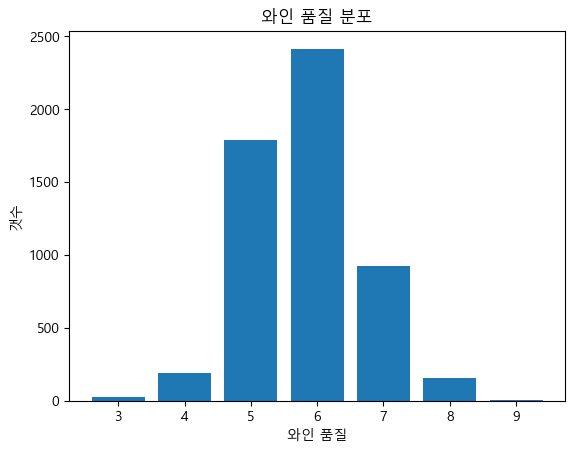

In [54]:
x = train['quality'].value_counts().sort_index().index
y = train['quality'].value_counts().sort_index().values

plt.rc('font', family='Malgun Gothic')
plt.title('와인 품질 분포')
plt.xlabel('와인 품질')
plt.ylabel('갯수')

plt.bar(x,y)
plt.show()

### 5. Feature Engineering 1 : 범주형 변수 변환

In [55]:
train['type'] = train['type'].apply(lambda x: 0 if x == 'white' else 1)
train

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,1
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,0
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,0
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,5492,5,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,0
5493,5493,6,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,0
5494,5494,7,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,0
5495,5495,5,6.6,0.410,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,0


### 6. Feature Engineering 2 : 정규화

In [56]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train[train.columns[2:-1]])
train[train.columns[2:-1]] = scaler.transform(train[train.columns[2:-1]])
train

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,0.148760,0.410000,0.036145,0.095092,0.054908,0.027778,0.179724,0.139001,0.551181,0.123596,0.318841,0
1,1,5,0.413223,0.353333,0.084337,0.027607,0.096506,0.031250,0.082949,0.188741,0.354331,0.207865,0.217391,1
2,2,5,0.338843,0.086667,0.234940,0.021472,0.079867,0.069444,0.304147,0.089647,0.244094,0.168539,0.420290,0
3,3,6,0.264463,0.086667,0.186747,0.082822,0.061564,0.097222,0.235023,0.130904,0.409449,0.157303,0.405797,0
4,4,6,0.330579,0.213333,0.156627,0.136503,0.083195,0.107639,0.396313,0.161751,0.236220,0.117978,0.420290,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,5492,5,0.322314,0.046667,0.174699,0.010736,0.033278,0.031250,0.133641,0.117409,0.480315,0.095506,0.304348,0
5493,5493,6,0.206612,0.066667,0.216867,0.009202,0.041597,0.086806,0.241935,0.069983,0.330709,0.162921,0.434783,0
5494,5494,7,0.330579,0.046667,0.204819,0.007669,0.043261,0.104167,0.200461,0.074224,0.259843,0.280899,0.478261,0
5495,5495,5,0.231405,0.220000,0.186747,0.015337,0.054908,0.059028,0.218894,0.093310,0.307087,0.106742,0.362319,0


### 7. test 데이터 전처리 (test Data Preprocessing)

In [57]:
test['type'] = test['type'].apply(lambda x : 0 if x == 'white' else 1)
test[test.columns[1:-1]] = scaler.transform(test[test.columns[1:-1]])
test

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,0.429752,0.153333,0.289157,0.092025,0.056572,0.034722,0.154378,0.128976,0.125984,0.089888,0.521739,0
1,1,0.785124,0.233333,0.349398,0.019939,0.101498,0.048611,0.078341,0.256217,0.251969,0.151685,0.144928,1
2,2,0.223140,0.133333,0.162651,0.070552,0.051581,0.149306,0.398618,0.148255,0.354331,0.264045,0.202899,0
3,3,0.280992,0.046667,0.234940,0.018405,0.056572,0.069444,0.352535,0.148255,0.614173,0.140449,0.289855,0
4,4,0.247934,0.120000,0.156627,0.021472,0.016639,0.078125,0.152074,0.063621,0.330709,0.140449,0.550725,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,0.272727,0.340000,0.012048,0.026074,0.121464,0.079861,0.202765,0.199152,0.637795,0.174157,0.246377,1
996,996,0.404959,0.046667,0.180723,0.015337,0.061564,0.097222,0.285714,0.136688,0.377953,0.089888,0.260870,0
997,997,0.413223,0.386667,0.156627,0.016871,0.108153,0.010417,0.039171,0.192597,0.322835,0.292135,0.173913,1
998,998,0.264463,0.226667,0.114458,0.026074,0.103161,0.059028,0.069124,0.147484,0.511811,0.191011,0.420290,1


### 8. Feature Selection : 종속변수 & 독립변수 설정

In [58]:
features = train.columns[2:]

X = train[features]
y = train['quality']

### 9. train 데이터와 Validation 데이터 분리하기

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, shuffle=True)

#데이터 shape 확인
print(f"X_train.shape : {X_train.shape}")
print(f"y_train.shape : {y_train.shape}")
print(f"X_valid.shape : {X_valid.shape}")
print(f"y_valid.shape : {y_valid.shape}")

X_train.shape : (4947, 12)
y_train.shape : (4947,)
X_valid.shape : (550, 12)
y_valid.shape : (550,)


### 10. RandomForest 모델 선택/학습/예측

In [60]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10, random_state=42)
model.fit(X_train, y_train)
predict = model.predict(X_valid)
print(predict[:10])

[6 7 5 6 5 7 5 5 5 6]


### 11. 평가산식 : ACCURACY(정확도)

In [62]:
import numpy as np

def ACC(y_true, pred):   
    score = np.mean(y_true==pred)
    return score

acc = ACC(y_valid, predict)

print(f"모델의 정확도는 {acc*100:.2f}%입니다.")

모델의 정확도는 66.73%입니다.


### 12. 모델 검증 시각화

그래프를 통하여 ACCURACY를 시각화해 결괏값과 실제값을 비교해 보자.

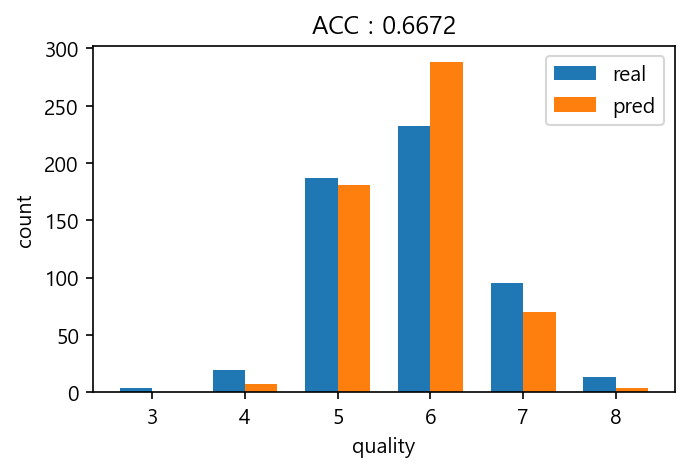

In [74]:
import numpy as np

##### 모델 검증 시각화 #####
def make_plot(y_true, pred):
    
    acc = ACC(y_true, pred)
    df_validation = pd.DataFrame({'y_true':y_true, 'y_pred':pred})

    # 검증 데이터 정답지('y_true') 빈도수 (sorted)
    df_validation_count = pd.DataFrame(df_validation['y_true'].value_counts().sort_index())
    # 검증 데이터 예측치('y_pred') 빈도수 (sorted)
    df_pred_count =  pd.DataFrame(df_validation['y_pred'].value_counts().sort_index())

    # pd.concat - 검증 데이타 정답지, 예측치 빈도수 합치기
    df_val_pred_count = pd.concat([df_validation_count,df_pred_count], axis=1).fillna(0)
    df_val_pred_count.columns = ['y_true', 'y_pred']
    ############################################################
    # 그래프 그리기
    ############################################################
    
    x = df_validation_count.index
    y_true_count = df_val_pred_count['y_true']
    y_pred_count = df_val_pred_count['y_pred']

    width = 0.35
    plt.figure(figsize=(5,3),dpi=150)

    plt.title('ACC : ' + str(acc)[:6])
    plt.xlabel('quality')
    plt.ylabel('count')

    p1 = plt.bar([idx-width/2 for idx in x], y_true_count, width, label='real')
    p2 = plt.bar([idx+width/2 for idx in x], y_pred_count, width, label='pred')

    plt.legend()
    plt.show()
    
make_plot(y_valid, predict)

### 13. 와인 품질(quality) 예측을 위한 원본 데이터 모델링

In [76]:
features = train.columns[2:]

X = train[features]
y = train['quality']

model = RandomForestClassifier(n_estimators=10, random_state=42)
model.fit(X, y)
predict = model.predict(test[features])

### 14.submission 파일에 값 채우기 및 csv 파일 저장

In [77]:
submission['quality'] = predict
submission.head()

,index,quality
0,0,5
1,1,6
2,2,6
3,3,5
4,4,6


In [78]:
submission.to_csv('data/wine/submission.csv', index=False)

## 스테이지 5

### 1. csv 파일 읽어오기

In [121]:
train = pd.read_csv('data/wine/train.csv')
test = pd.read_csv('data/wine/test.csv')
submission = pd.read_csv('data/wine/sample_submission.csv')

### 2. Features1 : vs. quality

지난 스테이지에서 Target 와인 품질 라벨을 시각화하고 분포를 살펴보았다면,
이번 스테이지에서는 Target (‘quality’등급)에 따른 각 Feature들의 통계량을 살펴보고 이를 bar 그래프로 시각화 하여 분석해 보자.

그래프를 보면 volatile acidity, chlorides, density 변수는 대체로 등급이 높아질수록 감소한는 것을 확인할 수 있고, citri acid 변수는 등급이 높아질수록 증가하는 것을 확인해볼 수 있다.

In [122]:
train_.groupby('quality').mean().reset_index()

,quality,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,3,2847.730769,7.811538,0.538077,0.266923,5.203846,0.076500,40.096154,121.461538,0.995713,3.250385,0.500000,10.251923
1,4,2692.709677,7.269892,0.447285,0.280323,4.145430,0.059247,20.553763,104.811828,0.994730,3.228602,0.500484,10.180376
2,5,2762.370805,7.329195,0.387855,0.308043,5.792422,0.064417,30.174217,120.370805,0.995843,3.213384,0.525017,9.846875
3,6,2741.139901,7.166743,0.312301,0.323411,5.535141,0.053932,30.969578,115.357616,0.994527,3.219611,0.532686,10.606015
4,7,2794.899351,7.123972,0.289724,0.332987,4.748918,0.045352,30.457251,108.178571,0.993122,3.228333,0.546786,11.383864
5,8,2466.427632,6.839474,0.292730,0.330263,5.581579,0.041105,34.585526,119.421053,0.992544,3.216711,0.506184,11.680921
6,9,2354.800000,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


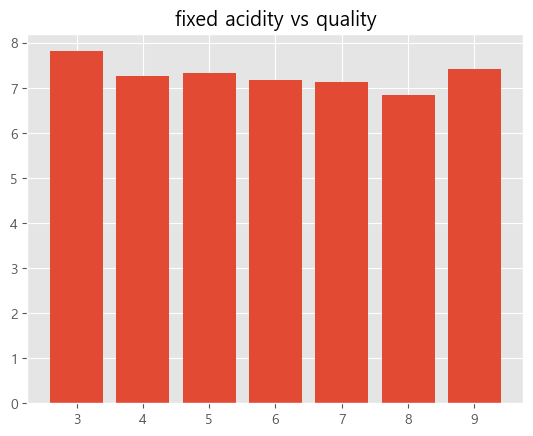

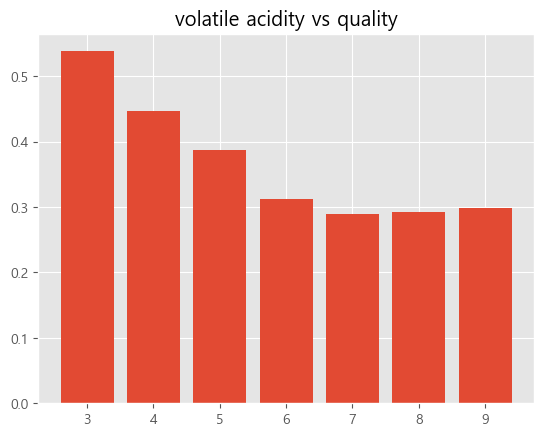

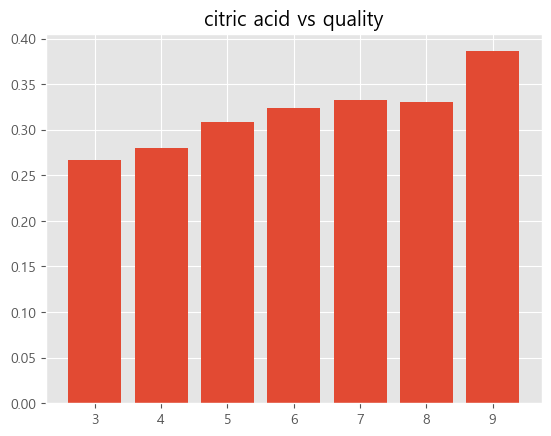

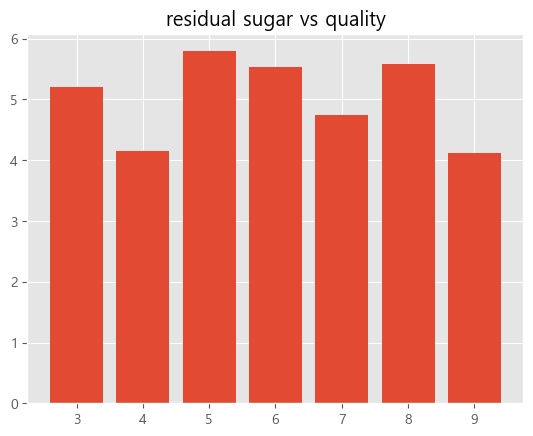

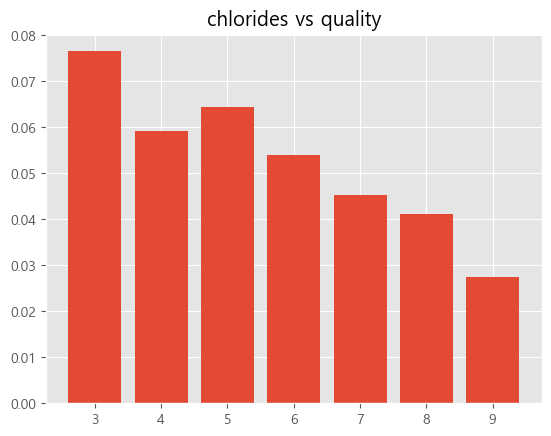

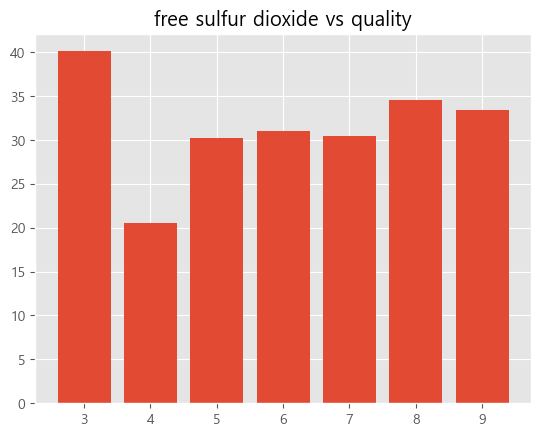

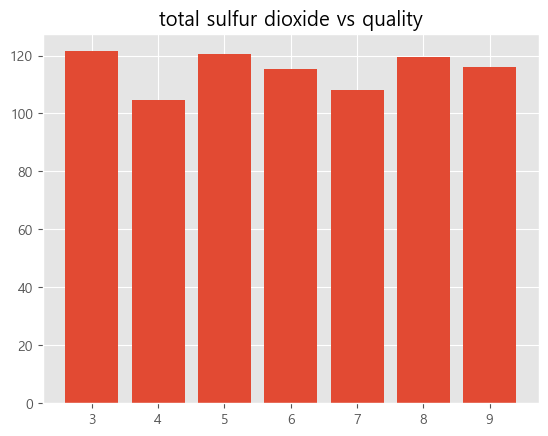

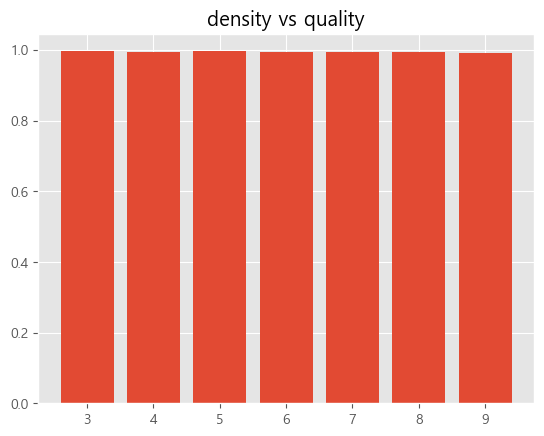

In [123]:
def make_plots(text:str):
    plt.title(text + ' vs quality')

    x = train_.groupby('quality').mean().reset_index()['quality']
    y = train_.groupby('quality').mean().reset_index()[text]

    plt.bar(x,y)
    plt.show()

train_ = train.copy().iloc[:, :-1]

for col in train_.groupby('quality').mean().reset_index().columns[2:-3]:
    make_plots(col)

### 4. Features2 : 변수간 상관관계

이제 변수들 간의 상관 관계를 확인하기 위해 상관 행렬을 시각화해 보지.

결과를 확인해보면, 전반적으로 상관계수가 상당히 높은 편이다. 특히 total sulfur dioxide(총 이산화황)와 free sulfur dioxide(유리 이산화황)의 상관계수가 0.72로 매우 높다. 따라서 다음과 같은 결론을 내릴 수 있다.

**이산화황을 나타내는 변수끼리 상관관계가 높아 다중공선성이 발생할 것이다.**

C:\Users\CHOYS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\CHOYS\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


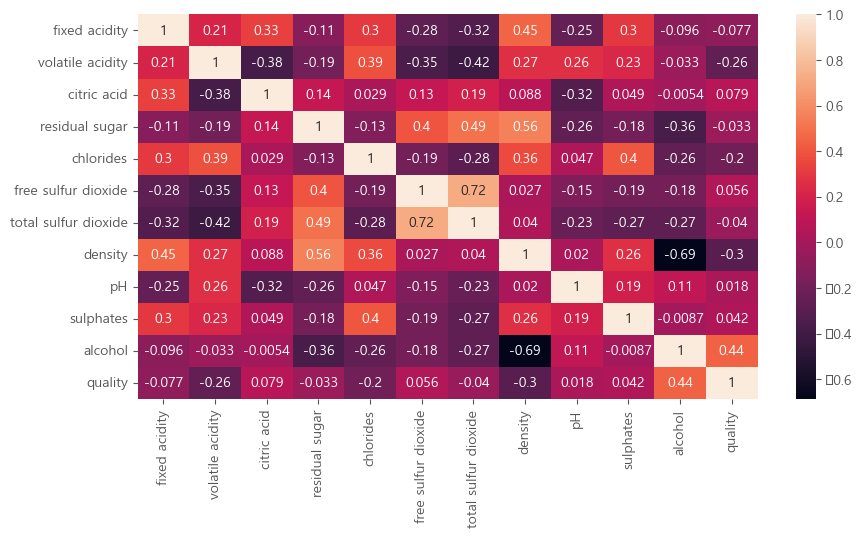

In [124]:
import seaborn as sns

features = ['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

plt.figure(figsize=(10,5))
ax = sns.heatmap(train[list(features) + ['quality']].corr(), annot=True)
plt.show()

### 5. 와인 종류(type)별 데이터 개수

화이트 와인의 개수가 대략 3배 많은 것을 확인할 수 있다.

In [125]:
white = train[train['type'] == 'white']
red = train[train['type'] == 'red']

print('화이트 와인 데이터 개수 : ', white.shape[0])
print('레드와인 와인 데이터 개수 : ', red.shape[0])

화이트 와인 데이터 개수 :  4159
레드와인 와인 데이터 개수 :  1338


### 6. 와인 종류(type)에 따른 품질(qulity) 분포 시각화

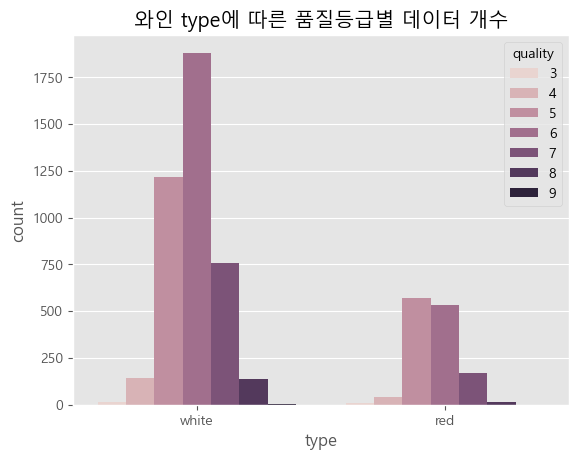

In [126]:
plt.style.use("ggplot")

sns.countplot(data=train, x='type', hue='quality')
plt.title("와인 type에 따른 품질등급별 데이터 개수") 
plt.show()

### 7.와인 품질 분포: 화이트 와인 vs 레드 와인

아래 그래프를 보면, 레드와인에 비해 화이트 와인이 6,7,8 품질이 많은 것을 확인할 수 있다.

이를 통해, **와인의 타입도 품질의 영향을 미친다고 볼 수 있다.**

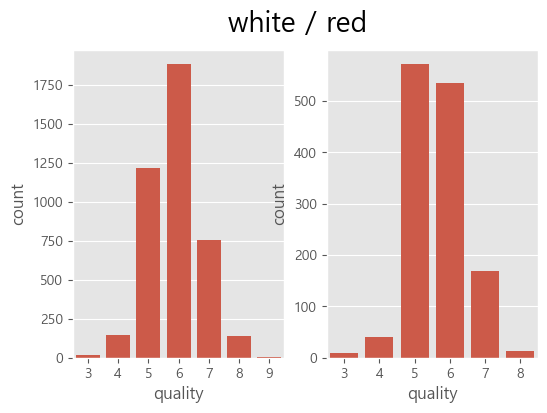

In [127]:
plt.style.use("ggplot")

plt.figure(figsize=(6,4))
plt.suptitle("white / red", fontsize=20)

## white
plt.subplot(1,2,1)
sns.barplot(x = white['quality'].value_counts().index, y = white['quality'].value_counts())

## red
plt.subplot(1,2,2)
sns.barplot(x = red['quality'].value_counts().index, y = red['quality'].value_counts())
plt.show()

### 8.다중 공선성이 발생한 변수

이산화황 변수들 간 다중 공선성 해결을 위해 Feature Engineering을 진행해 보자.

먼저, 다중 공선성이 높았던 이산화황 변수 total sulfur dioxide와 free sulfur dioxide 를 살펴보자.

In [128]:
total_count = sum(train['total sulfur dioxide'] > train['free sulfur dioxide'])
same_count =  sum(train['total sulfur dioxide'] == train['free sulfur dioxide'])
sulfur_count = sum(train['total sulfur dioxide'] < train['free sulfur dioxide'])              

print('total > free에 해당하는 개수 :', total_count)
print('두 변수가 같은 경우의 개수 :', same_count)
print('total < free에 해당하는 개수 :', sulfur_count)

total > free에 해당하는 개수 : 5497
두 변수가 같은 경우의 개수 : 0
total < free에 해당하는 개수 : 0


위의 결과를 통해 추정할 수 있는 것은 
$$총 이산화황 = 유리 이산화황 + \alpha$$로 볼 수 있다.

그러모르 다중공선성 해결을 위해 파생변수 total sulfur dioxide - free sulfur dioxide를 만든 뒤 total sulfur dioxide를 삭제하겠다.

### 9. 파생변수(free et sulfur dioxid) 생성

In [129]:
train['free et sulfur dioxide'] = train['total sulfur dioxide'] - train['free sulfur dioxide']   
test['free et sulfur dioxide'] = test['total sulfur dioxide'] - test['free sulfur dioxide']

### 10. 불필요한 변수(total sulfur dioxide) 제거

In [130]:
train = train.drop(['total sulfur dioxide'], axis = 1)   
test = test.drop(['total sulfur dioxide'], axis = 1)

### 11. Feature Engineering 1 : 범주형 변수 변환

In [131]:
train['type'] = train['type'].apply(lambda x: 0 if x=='white' else 1)   
test['type'] = test['type'].apply(lambda x: 0 if x=='white' else 1)   

### 12. Feature Engineering 2 : 정규화

In [132]:
from sklearn.preprocessing import MinMaxScaler

features = ['fixed acidity', 'volatile acidity', 'citric acid',       
       'residual sugar', 'chlorides', 'free sulfur dioxide',         
       'free et sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']        

scaler = MinMaxScaler()          
scaler.fit(train[features])          
train[features] = scaler.transform(train[features])
test[features] = scaler.transform(test[features])

### 13. Feature Selection : 종속변수 & 독립변수 설정

In [133]:
features = train.columns[2:]

X = train[features]
y = train['quality']

### 14. 지난 스테이지 함수 불러오기

In [135]:
import numpy as np

##### 평가산식 : ACCURACY(정확도) #####
def ACC(y_true, pred):   
    score = np.mean(y_true==pred)
    return score

##### 모델 검증 시각화 #####
def make_plot(y_true, pred):
    
    acc = ACC(y_true, pred)
    df_validation = pd.DataFrame({'y_true':y_true, 'y_pred':pred})

    # 검증 데이터 정답지('y_true') 빈도수 (sorted)
    df_validation_count = pd.DataFrame(df_validation['y_true'].value_counts().sort_index())
    # 검증 데이터 예측치('y_pred') 빈도수 (sorted)
    df_pred_count =  pd.DataFrame(df_validation['y_pred'].value_counts().sort_index())

    # pd.concat - 검증 데이타 정답지, 예측치 빈도수 합치기
    df_val_pred_count = pd.concat([df_validation_count,df_pred_count], axis=1).fillna(0)
    df_val_pred_count.columns = ['y_true', 'y_pred']
    ############################################################
    # 그래프 그리기
    ############################################################
    
    x = df_validation_count.index
    y_true_count = df_val_pred_count['y_true']
    y_pred_count = df_val_pred_count['y_pred']

    width = 0.35
    plt.figure(figsize=(5,3),dpi=150)

    plt.title('ACC : ' + str(acc)[:6])
    plt.xlabel('quality')
    plt.ylabel('count')

    p1 = plt.bar([idx-width/2 for idx in x], y_true_count, width, label='real')
    p2 = plt.bar([idx+width/2 for idx in x], y_pred_count,  width, label='pred')

    plt.legend()
    plt.show()

### 15. Stratified K-Fold Cross Validation을 활용한 Random Forest 모델

이번 스테이지에서는 K-겹 교차 검증을 통해 모델을 평가하고, 이를 앙상블하여 최종 결과를 얻으려고 한다.

StratifiedKFold는 층화된 K-fold 교차검증을 의미한다. K-fold의 경우 데이터셋을 일정한 간격으로 나누기 때문에, target 데이터의 비율이 일정하지 않아 데이터 편향이 발생할 수 있다. StratifiedKFold는 이러한 단점을 보완하여 각 폴드의 데이터가 전체 데이터의 label 분포와 유사하도록 조절한다.

RandomForestClassifier(random_state=42)


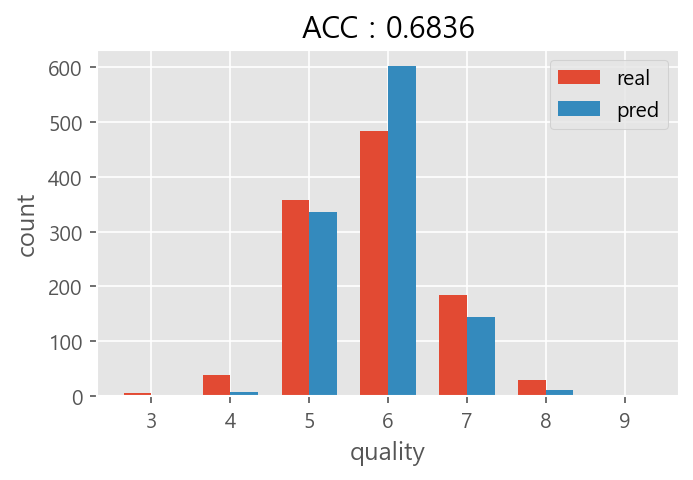

RandomForestClassifier(random_state=42)


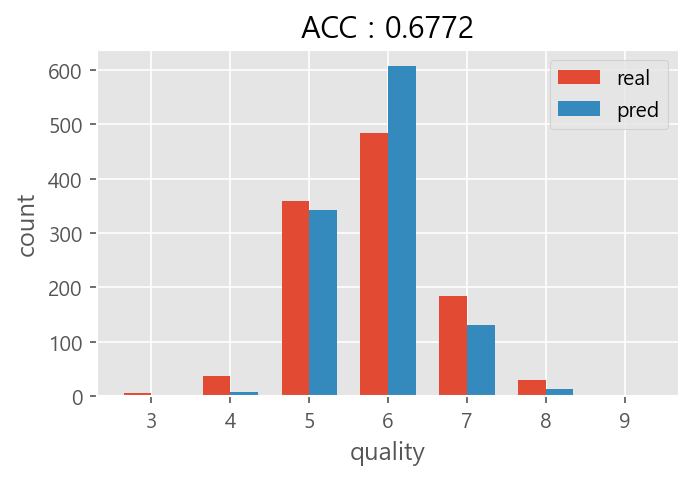

RandomForestClassifier(random_state=42)


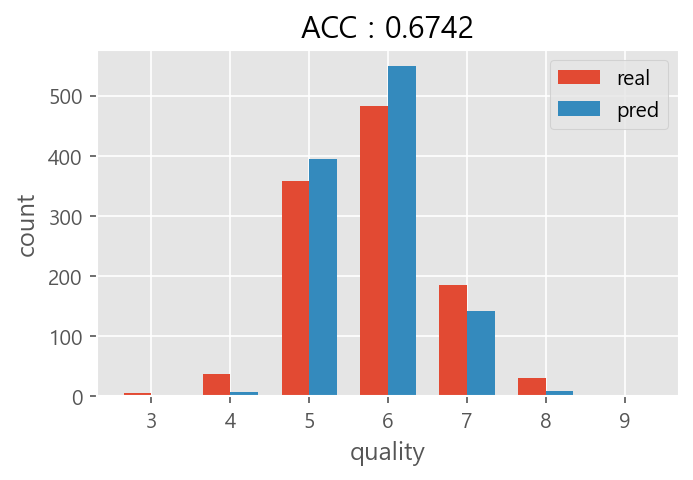

RandomForestClassifier(random_state=42)


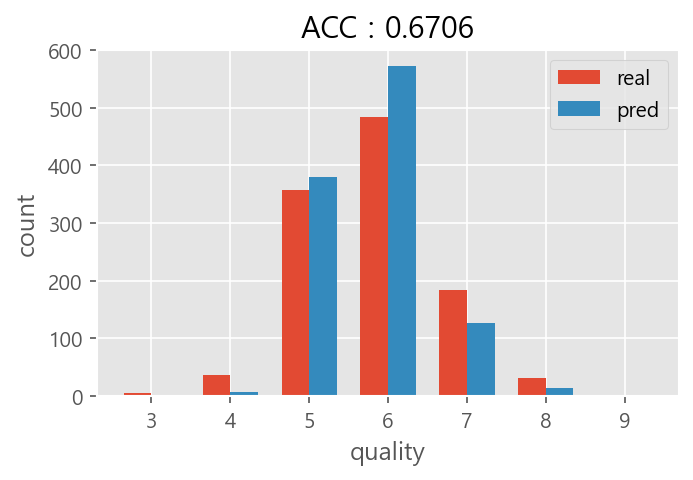

RandomForestClassifier(random_state=42)


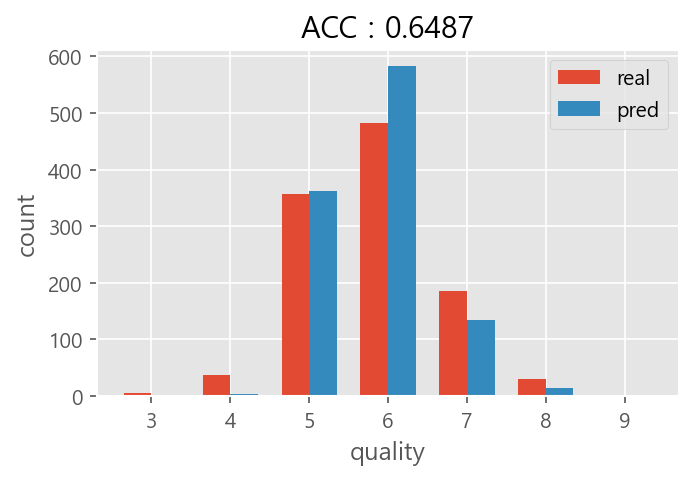

In [137]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models = []

i=0

for train_idx, valid_idx in kfold.split(X,y):
    X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
    y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]

    model = RandomForestClassifier(random_state=42)

    model.fit(X_train, y_train)
    
    models.append(model)

    predict = model.predict(X_valid)
    print(models[i])
    i += 1

    make_plot(y_valid, predict)

### 16. Stratified K-Fold Cross Validation 예측값 생성

In [138]:
predict = models[0].predict(test[features])
predict[:10]

array([5, 6, 6, 6, 6, 6, 6, 6, 6, 7], dtype=int64)

### 17. submission 파일에 값 채우기

In [139]:
submission['quality'] = predict

### 18. 앙상블 기법을 활용한 모델 예측

앙상블 기법은 다양한 형태로 적용될 수 있다.
가장 대표적인 앙상블 기법은 보팅(Voting), 배깅(Bagging), 부스팅(Boosting), 스태킹(Stacking) 등이 있다.
이번엔 보팅, 그중에서도 하드 보팅(Hard Voting)을 첫 번째 방법으로 사용해 보고자 한다.

하드 보팅은 여러 개의 모델이 예측한 결과 중 가장 많은 투표를 받은 클래스 를 최종 예측 결과로 선택하는 방식이다.

In [140]:
pred0 = models[0].predict(test[features])       
pred1 = models[1].predict(test[features])          
pred2 = models[2].predict(test[features])          
pred3 = models[3].predict(test[features])         
pred4 = models[4].predict(test[features])

### 19. 앙상블 예측 결과 종합

In [141]:
pred = pd.DataFrame({'pred0':pred0, 'pred1':pred1, 'pred2':pred2, 'pred3':pred3, 'pred4':pred4})
pred

,pred0,pred1,pred2,pred3,pred4
0,5,5,6,6,6
1,6,5,5,6,5
2,6,6,6,6,6
3,6,5,5,5,5
4,6,6,6,6,6
...,...,...,...,...,...
995,6,6,6,6,5
996,6,6,6,6,5
997,5,5,5,5,5
998,6,6,6,6,6


### 20. 하드 보팅 예측값 데이터프레임 생성

pred.mode(axis=1)은 각 행의 최빈값을 계산한 결과를 반환한다.

In [142]:
pred.mode(axis=1) 

,0
0,6
1,5
2,6
3,5
4,6
...,...
995,6
996,6
997,5
998,6


### 21. predict_proba(예측 확률)을 이용한 소프트 보팅

이번에는 소프트 보팅을 사용하여 예측을 수행해보자.

소프트 보팅은 각 분류기(모델)의 클래스 값 결정 확률을 모두 더한 후 평균을 구하여 가장 높은 확률을 가지는 클래스를 최종 보팅 결과로 선택한다.

In [144]:
pred0 = models[0].predict_proba(test[features])
pred1 = models[1].predict_proba(test[features])
pred2 = models[2].predict_proba(test[features])
pred3 = models[3].predict_proba(test[features])
pred4 = models[4].predict_proba(test[features])

pd.DataFrame((pred0))

,0,1,2,3,4,5,6
0,0.01,0.14,0.40,0.23,0.17,0.05,0.0
1,0.03,0.10,0.38,0.46,0.03,0.00,0.0
2,0.01,0.02,0.34,0.58,0.05,0.00,0.0
3,0.01,0.03,0.30,0.48,0.17,0.01,0.0
4,0.00,0.07,0.05,0.47,0.36,0.05,0.0
...,...,...,...,...,...,...,...
995,0.00,0.01,0.29,0.70,0.00,0.00,0.0
996,0.00,0.08,0.30,0.56,0.04,0.02,0.0
997,0.00,0.06,0.58,0.33,0.03,0.00,0.0
998,0.00,0.03,0.25,0.63,0.08,0.01,0.0


### 22. 클래스 별 확률

In [145]:
pred = pd.DataFrame((pred0 + pred1 + pred2 + pred3 + pred4)/ 5)

In [148]:
pred

,0,1,2,3,4,5,6
0,0.006,0.104,0.348,0.344,0.138,0.060,0.000
1,0.038,0.078,0.450,0.422,0.012,0.000,0.000
2,0.014,0.034,0.300,0.610,0.040,0.002,0.000
3,0.002,0.016,0.606,0.286,0.086,0.004,0.000
4,0.000,0.038,0.060,0.546,0.310,0.042,0.004
...,...,...,...,...,...,...,...
995,0.000,0.012,0.396,0.590,0.002,0.000,0.000
996,0.000,0.058,0.360,0.460,0.112,0.010,0.000
997,0.004,0.034,0.610,0.318,0.032,0.002,0.000
998,0.000,0.048,0.176,0.710,0.058,0.008,0.000


### 23. 소프트 보팅 예측값 데이터프레임 생성

argmax 함수를 이용하여 주어진 축을 따라 가장 큰 값의 인덱스를 반환해 보자.

+3은 인덱스 값을 클래스의 실제 레이블 값으로 변환하는 부분이다. 클래스는 0 ~ 6의 수로 구성되어 있는데 학습 데이터에 분포한 실제 클래스는 3 ~ 9이다.

In [149]:
pred = pd.DataFrame(np.array(pred).argmax(axis=1)+3)
pred

,0
0,5
1,5
2,6
3,5
4,6
...,...
995,6
996,6
997,5
998,6


### 24. submission 파일에 값 채우기 및 csv 파일 저장

In [152]:
submission['quality'] = pred
submission.head(8)

,index,quality
0,0,5
1,1,5
2,2,6
3,3,5
4,4,6
5,5,6
6,6,6
7,7,6


In [153]:
submission.to_csv('data/wine/submission.csv', index=False)

## 스테이지 6

### 1. csv 파일 읽어오기

In [161]:
train = pd.read_csv('data/wine/train.csv')
test = pd.read_csv('data/wine/test.csv')
submission = pd.read_csv('data/wine/sample_submission.csv')

### 2. train 데이터셋 One-hot encoding 적용

이번 스테이지에서는 get_dummies 함수와 더미 변수를 만드는 One-hot encoding 을 사용하여
범주형 변수를 처리해 보자.

이후 True, False 처리된 것을 int형으로 바꿔보자.

In [162]:
train_dummies = pd.get_dummies(train['type'])
train = pd.concat([train,train_dummies], axis=1)     
train = train.drop(labels = 'type', axis = 1)            
# train.rename(columns = {0:'white', 1:'red'}, inplace = True)

In [171]:
train[['red', 'white']] = train[['red', 'white']].astype('uint8')

### 3. test 데이터 셋 One-hot encoding 적용

test 데이터셋에도동일하게 적용한다.

In [164]:
test_dummies = pd.get_dummies(test['type'])
test = pd.concat([test,test_dummies], axis=1)       
test = test.drop(labels = 'type', axis = 1)          
# test.rename(columns = {0:'white', 1:'red'}, inplace = True)

In [173]:
test[['red', 'white']] = train[['red', 'white']].astype('uint8')

### 4. Feature Selection : 종속변수 & 독립변수 설정

In [174]:
features = train.columns[2:]

X = train[features]
y = train['quality']

### 5. RandomForestClassifier의 최적 하이퍼파라미터 탐색 및 전체 데이터 학습

In [175]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {'n_estimators' : [100, 150, 200],
          'criterion' : ['gini', 'entropy']}

rf_total = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=params, cv=2, return_train_score=True, verbose=3)

rf_total.fit(X,y)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV 1/2] END criterion=gini, n_estimators=100;, score=(train=1.000, test=0.625) total time=   0.4s
[CV 2/2] END criterion=gini, n_estimators=100;, score=(train=1.000, test=0.627) total time=   0.3s
[CV 1/2] END criterion=gini, n_estimators=150;, score=(train=1.000, test=0.626) total time=   0.5s
[CV 2/2] END criterion=gini, n_estimators=150;, score=(train=1.000, test=0.626) total time=   0.5s
[CV 1/2] END criterion=gini, n_estimators=200;, score=(train=1.000, test=0.623) total time=   0.6s
[CV 2/2] END criterion=gini, n_estimators=200;, score=(train=1.000, test=0.627) total time=   0.7s
[CV 1/2] END criterion=entropy, n_estimators=100;, score=(train=1.000, test=0.624) total time=   0.4s
[CV 2/2] END criterion=entropy, n_estimators=100;, score=(train=1.000, test=0.628) total time=   0.4s
[CV 1/2] END criterion=entropy, n_estimators=150;, score=(train=1.000, test=0.630) total time=   0.6s
[CV 2/2] END criterion=entropy, n_estima

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [100, 150, 200]},
             return_train_score=True, verbose=3)

### 6. 최적 성능 & 하이퍼파라미터 출력

In [176]:
total_score = rf_total.best_score_
total_params = rf_total.best_params_

print("최적 성능 : ",total_score)
print("최적 하이퍼파라미터 : ",total_params) 

최적 성능 :  0.6328911188030264
최적 하이퍼파라미터 :  {'criterion': 'entropy', 'n_estimators': 150}


### 7. 앙상블에 활용될 RandomForest, GradientBoosting, ExtraTrees 분류기 모델

앙상블 모델을 학습하기 전에 개별 모델들을 최적화하기 위해, 다음과 같은 모델들을 선언한다.

이번 최적화 과정을 통해 개별 모델들의 성능을 향상시키고, 앙상블 모델의 예측력을 향상시킬 것이다.
각 개별 모델은 독립적으로 최적화되며, 최적의 하이퍼파라미터 조합을 찾기 위해 적절한 탐색 알고리즘을 활용할 수 있다.

* RandomForestClassifier는 무작위로 선택된 결정 트리들의 앙상블로 구성된 분류기이다.
* GradientBoostingClasifier는 경사 하강법을 이용한 부스팅 알고리즘 기반으로 한 분류기이다.
* ExtraTreesClassifier는 무작위로 선택된 결정 트리들의 앙상블로 구성된 분류기이다.

In [177]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

models = []

rfc = RandomForestClassifier(random_state=42)
models.append(rfc)

gbc = GradientBoostingClassifier(random_state=42)
models.append(gbc)

etc = ExtraTreesClassifier(random_state=42)
models.append(etc)

### 8. 앙상블 모델 파라미터 최적화를 위한 GridSearchCV 설정

In [178]:
params = [] # 모델들의 파라미터들을 할당할 리스트를 만들어 줍니다

params_rfc = {'n_estimators' : [100, 120, 140]} # params 리스트에 성능을 비교하고자 하는 파라미터들을 선언합니다
params.append(params_rfc) # 파라미터들을 리스트에 저장합니다

params_gbc = {'learning_rate':[0.05,0.1,0.15],
             'n_estimators':[60,100,140]}
params.append(params_gbc)

params_etc = {'n_estimators' : [50,100,150]}
params.append(params_etc)

In [179]:
params

[{'n_estimators': [100, 120, 140]},
 {'learning_rate': [0.05, 0.1, 0.15], 'n_estimators': [60, 100, 140]},
 {'n_estimators': [50, 100, 150]}]

### 9. 앙상블 모델의 파라미터 최적화를 통한 모델 선택

best_models는 각 모델에 대해 수행한 파라미터 GridSearchCV를 통해 얻은 최적의 모델들을 저장하는 딕셔너리이다.

즉, 각 모델의 최적 파라미터로 구성된 앙상블 모델로 구성되어 있다.

In [181]:
best_models={}

for i, model in enumerate(models):
    model = GridSearchCV(model, param_grid=params[i], cv=2, return_train_score=True, verbose=3)

    model.fit(X, y)

    best_models[i] = model.best_estimator_

Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV 1/2] END n_estimators=100;, score=(train=1.000, test=0.625) total time=   0.3s
[CV 2/2] END n_estimators=100;, score=(train=1.000, test=0.627) total time=   0.3s
[CV 1/2] END n_estimators=120;, score=(train=1.000, test=0.628) total time=   0.4s
[CV 2/2] END n_estimators=120;, score=(train=1.000, test=0.626) total time=   0.3s
[CV 1/2] END n_estimators=140;, score=(train=1.000, test=0.629) total time=   0.4s
[CV 2/2] END n_estimators=140;, score=(train=1.000, test=0.628) total time=   0.4s
Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV 1/2] END learning_rate=0.05, n_estimators=60;, score=(train=0.652, test=0.555) total time=   1.4s
[CV 2/2] END learning_rate=0.05, n_estimators=60;, score=(train=0.661, test=0.561) total time=   1.4s
[CV 1/2] END learning_rate=0.05, n_estimators=100;, score=(train=0.703, test=0.568) total time=   2.4s
[CV 2/2] END learning_rate=0.05, n_estimators=100;, score=(train=0.696, test

### 10. 각 모델의 최적 파라미터

In [182]:
best_models

{0: RandomForestClassifier(n_estimators=140, random_state=42),
 1: GradientBoostingClassifier(learning_rate=0.15, n_estimators=140,
                            random_state=42),
 2: ExtraTreesClassifier(random_state=42)}

### 11. Hard Voting Classifier

In [183]:
pred0 = best_models[0].predict(test[features])
pred1 = best_models[1].predict(test[features])
pred2 = best_models[2].predict(test[features])

pred = pd.DataFrame({'pred0':pred0, 'pred1':pred1, 'pred2':pred2})
pred

,pred0,pred1,pred2
0,6,6,6
1,6,6,6
2,6,6,6
3,5,6,5
4,6,6,6
...,...,...,...
995,6,5,4
996,6,6,5
997,5,5,5
998,6,6,6


### 12. mode 메소드를 이용한 Hard Voting

In [186]:
pred['pred'] = pred.mode(axis=1)[0].astype('int')
pred['pred']

0      6
1      6
2      6
3      5
4      6
      ..
995    4
996    6
997    5
998    6
999    6
Name: pred, Length: 1000, dtype: int32

### 13. Soft Voting Classifier

이번엔 소프트 부팅으로 해보자.

In [187]:
pred0 = best_models[0].predict_proba(test[features])
pred1 = best_models[1].predict_proba(test[features])
pred2 = best_models[2].predict_proba(test[features])

pred = pd.DataFrame((pred0 + pred1 + pred2)/3)
pred

,0,1,2,3,4,5,6
0,8.096141e-03,0.140103,0.295791,0.374355,0.153503,0.028147,5.557967e-06
1,1.620307e-02,0.088202,0.382610,0.488665,0.024090,0.000204,2.647764e-05
2,5.770613e-07,0.028924,0.372058,0.564982,0.026037,0.007998,6.535947e-07
3,1.022612e-06,0.012462,0.692098,0.225517,0.068485,0.001408,2.884710e-05
4,3.333698e-03,0.033410,0.044176,0.580765,0.312443,0.025873,1.007516e-11
...,...,...,...,...,...,...,...
995,7.009391e-07,0.222068,0.490705,0.274033,0.013068,0.000124,1.405659e-06
996,1.379411e-06,0.046184,0.382617,0.442347,0.115812,0.013030,8.901895e-06
997,5.720467e-03,0.028482,0.672924,0.260902,0.025926,0.006045,2.272769e-07
998,2.381238e-03,0.096069,0.248020,0.574863,0.062291,0.016375,1.071699e-06


### 14. Soft Voting 예측값 데이터프레임 생성

In [188]:
import numpy as np

pred = pd.DataFrame(np.array(pred).argmax(axis=1)+3)
pred

,0
0,6
1,6
2,6
3,5
4,6
...,...
995,5
996,6
997,5
998,6


### 15. sklearn을 이용한 Hard Voting 앙상블 분류기의 학습

이번에는 sklearn 패키지의 VotingClassifier 메소드를 사용하여 하드 보팅 앙상블 모델을 구현해보자.

In [189]:
from sklearn.ensemble import VotingClassifier #앙상블 기법을 위한 패키지

estimators = [
    ('rfc', best_models[0]),
    ('gbc', best_models[1]),
    ('etc', best_models[2])
]

model = VotingClassifier(estimators=estimators, voting='hard') #앙상블 모델 선언
model.fit(X, y) #모델 학습

VotingClassifier(estimators=[('rfc',
                              RandomForestClassifier(n_estimators=140,
                                                     random_state=42)),
                             ('gbc',
                              GradientBoostingClassifier(learning_rate=0.15,
                                                         n_estimators=140,
                                                         random_state=42)),
                             ('etc', ExtraTreesClassifier(random_state=42))])

### 16. sklearn을 이용한 Soft Voting 앙상블 분류기의 학습

In [190]:
from sklearn.ensemble import VotingClassifier 

estimators = [
    ('rfc', best_models[0]),
    ('gbc', best_models[1]),
    ('etc', best_models[2])
]

model = VotingClassifier(estimators=estimators, voting='soft') 
model.fit(X, y) 

VotingClassifier(estimators=[('rfc',
                              RandomForestClassifier(n_estimators=140,
                                                     random_state=42)),
                             ('gbc',
                              GradientBoostingClassifier(learning_rate=0.15,
                                                         n_estimators=140,
                                                         random_state=42)),
                             ('etc', ExtraTreesClassifier(random_state=42))],
                 voting='soft')

### 17. submission 파일에 값 채우기 및 csv 파일 저장

In [191]:
submission['quality'] = pd.DataFrame(model.predict(test[features]))
submission.head(10)

,index,quality
0,0,6
1,1,6
2,2,6
3,3,5
4,4,6
5,5,6
6,6,5
7,7,6
8,8,6
9,9,7


In [192]:
submission.to_csv('data/wine/submission.csv', index=False)